In [5]:
import numpy as np
from scipy.special import exp1
import matplotlib.pyplot as plt

In [6]:
#simple drawdown
kD = 900  # m2/d
S =0.25 # [-]
c= 300 # day
lamb = np.sqrt (kD*c)
Q= 1200 # m3/d
r= 350 # m
t= 1.2 # day
u= r**2*S/ (4*kD*t)

s = Q/ ( 4*np.pi *kD)* exp1(u)
print('drawdown s=', s, 'm')
print('drawdown s={:.4g} m'.format(s))

drawdown s= 1.1081798763072156e-05 m
drawdown s=1.108e-05 m


In [7]:
from scipy.special import exp1 as W

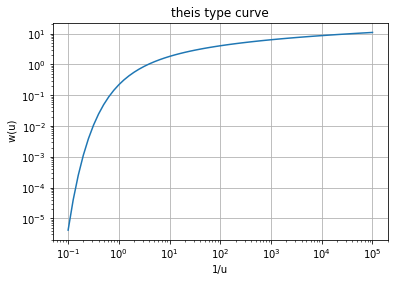

In [8]:
u = np.logspace(-5,1, 61) 
plt.title('theis type curve')
plt.xlabel('1/u')
plt.ylabel(' w(u)')
plt.plot(1/u, W(u))
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

Compute by Python the theis well function

$$ W(u) = \intop_u^\infty \frac { e^{-y}} {y} dy $$

In [9]:
u   = 0.1 
r= 0.2



def expint(u):
    'retur to the well fucntion by theis'
    
    y   = np.logspace( np.log10(u), 20, 5000)
    arg = np.exp (-y)/y
    dy  = np.diff (y)
    return np.sum(0.5*(arg [:-1]+arg[1:])*dy)   #  average of all


def Wh(u, rho):
    'return to out well fucntion'
    
    y   = np.logspace( np.log10(u), 20, 5000)
    arg = np.exp ((-y-(rho/2)**2)/y)/y
    dy  = np.diff (y)
    return np.sum(0.5*(arg [:-1]+arg[1:])*dy)

print (expint(u))                               #  
print(exp1(u))   
print(W(u))              #
print(Wh(u, r/lamb))                              # 


     #arg [34:38]
     #arg[:-3] # from first but not last 3
     #arg [1:] # second to last


1.8229742553684722
1.8229239584193906
1.8229239584193906
17.78882531887625


In [10]:
fname='Korendijk_data.txt'
f = open ( fname, 'r')
data = f. readlines ()
data = data [1:] # remove the header
data [:5]


['30\t30\t0.1\t0.04\n',
 '30\t30\t0.25\t0.08\n',
 '30\t30\t0.5\t0.13\n',
 '30\t30\t0.7\t0.18\n',
 '30\t30\t1\t0.23\n']

In [11]:
#d= 'John has, five hour time'
#e= d.split(',') # if not comma, the word will be individual
#print(e) # illustration of comprehension will be sse ifor the next exercise
#f= [d.upper() for d in e]
#g= [len(d)**3 for d in e]
#print (g)
#print (f)

In [12]:
toklist = [d.split() for d in data ]
toklist [:6]


[['30', '30', '0.1', '0.04'],
 ['30', '30', '0.25', '0.08'],
 ['30', '30', '0.5', '0.13'],
 ['30', '30', '0.7', '0.18'],
 ['30', '30', '1', '0.23'],
 ['30', '30', '1.4', '0.28']]

In [13]:
toklist=[d.split() for d in data]
toklist [:6]


[['30', '30', '0.1', '0.04'],
 ['30', '30', '0.25', '0.08'],
 ['30', '30', '0.5', '0.13'],
 ['30', '30', '0.7', '0.18'],
 ['30', '30', '1', '0.23'],
 ['30', '30', '1.4', '0.28']]

In [14]:
values = [] 
for line in toklist: 
    values.append ( [ float (d)  for d in line])
    
values = np.array ( values)
    

In [15]:
values [:10]

array([[30.  , 30.  ,  0.1 ,  0.04],
       [30.  , 30.  ,  0.25,  0.08],
       [30.  , 30.  ,  0.5 ,  0.13],
       [30.  , 30.  ,  0.7 ,  0.18],
       [30.  , 30.  ,  1.  ,  0.23],
       [30.  , 30.  ,  1.4 ,  0.28],
       [30.  , 30.  ,  1.9 ,  0.33],
       [30.  , 30.  ,  2.33,  0.36],
       [30.  , 30.  ,  2.8 ,  0.39],
       [30.  , 30.  ,  3.36,  0.42]])

In [16]:
np.sum( values, axis=1) # 1 means horizontal will be sum of row, if 0 it will calculate the column

array([  60.14 ,   60.33 ,   60.63 ,   60.88 ,   61.23 ,   61.68 ,
         62.23 ,   62.69 ,   63.19 ,   63.78 ,   64.45 ,   65.85 ,
         67.34 ,   68.87 ,   69.28 ,   70.6  ,   73.74 ,   78.68 ,
         87.742,   93.753,  101.779,  108.793,  119.819,  140.855,
        155.873,  199.915,  241.935,  305.966,  360.99 ,  421.007,
        541.05 ,  661.053,  789.072,  891.088,  115.515,  116.021,
        116.183,  116.704,  117.054,  117.575,  118.09 ,  118.434,
        119.633,  120.153,  121.678,  123.206,  127.25 ,  129.275,
        132.305,  139.348,  144.364,  154.404,  167.429,  174.444,
        189.467,  204.494,  219.507,  234.528,  264.55 ,  294.569,
        362.593,  415.614,  477.636,  536.657,  656.679,  716.688,
        794.701,  899.718,  959.716,  301.089,  362.138,  420.165,
        486.186,  540.196,  601.207,  665.214,  841.227, 1015.25 ])

In [17]:
np.sin ( values)

array([[-0.98803162, -0.98803162,  0.09983342,  0.03998933],
       [-0.98803162, -0.98803162,  0.24740396,  0.07991469],
       [-0.98803162, -0.98803162,  0.47942554,  0.12963414],
       [-0.98803162, -0.98803162,  0.64421769,  0.17902957],
       [-0.98803162, -0.98803162,  0.84147098,  0.22797752],
       [-0.98803162, -0.98803162,  0.98544973,  0.27635565],
       [-0.98803162, -0.98803162,  0.94630009,  0.32404303],
       [-0.98803162, -0.98803162,  0.72538439,  0.35227423],
       [-0.98803162, -0.98803162,  0.33498815,  0.38018842],
       [-0.98803162, -0.98803162, -0.21667508,  0.40776045],
       [-0.98803162, -0.98803162, -0.7568025 ,  0.43496553],
       [-0.98803162, -0.98803162, -0.80352016,  0.47942554],
       [-0.98803162, -0.98803162,  0.49411335,  0.51413599],
       [-0.98803162, -0.98803162,  0.90217183,  0.53963205],
       [-0.98803162, -0.98803162,  0.66296923,  0.54802394],
       [-0.98803162, -0.98803162, -0.54402111,  0.56464247],
       [-0.98803162, -0.

In [18]:
np.unique ( values [:, 0])

array([ 30.,  90., 215.])

In [19]:
np.unique ( values[:, 3])

array([0.015, 0.021, 0.023, 0.04 , 0.044, 0.054, 0.075, 0.08 , 0.089,
       0.09 , 0.104, 0.13 , 0.133, 0.138, 0.153, 0.165, 0.178, 0.18 ,
       0.186, 0.196, 0.206, 0.207, 0.214, 0.227, 0.23 , 0.25 , 0.275,
       0.28 , 0.305, 0.33 , 0.348, 0.36 , 0.364, 0.39 , 0.404, 0.42 ,
       0.429, 0.444, 0.45 , 0.467, 0.494, 0.5  , 0.507, 0.528, 0.54 ,
       0.55 , 0.569, 0.57 , 0.58 , 0.593, 0.6  , 0.614, 0.636, 0.64 ,
       0.657, 0.679, 0.68 , 0.688, 0.701, 0.716, 0.718, 0.742, 0.753,
       0.779, 0.793, 0.819, 0.855, 0.873, 0.915, 0.935, 0.966, 0.99 ,
       1.007, 1.05 , 1.053, 1.072, 1.088])

Object `varies` not found.


NameError: name 'varies' is not defined

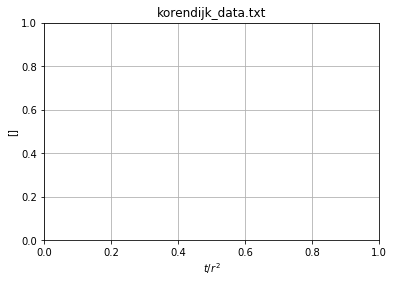

In [22]:

plt.title ('korendijk_data.txt')
plt.ylabel('[]')
plt.xlabel('$ t/r^2$')
plt.grid()
distances = np.unique ( values [ :, 0])
for d in distances:
    I = values [ :, 0] ==d
    t= values [I, 2]
    plt.plot( vlaues [I,2], values[I, 3], ' . ', label='$t/r^2$={} m'. format ( r))
    A=1 
    B=1
    u = np.logspace ( -3, 1, 41)
    plt.plt ( B *1/u, A* exp1(u), 'k', lw =3, label ='theis type curve')
plt.legend()
plt.show()